# Netflix Titles Analysis

Problem Statement: This notebook investigates how the number of titles added to Netflix has changed over time. We will analyze the *date_added* column to identify trends in Netflix content acquisition from 2008 to 2021.

### imports 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
from pathlib import Path

### netflix titles data loading

In [2]:
PROJECT_ROOT = Path.cwd() if (Path.cwd() / "data").exists() else Path.cwd().parent
DATA_DIR = PROJECT_ROOT / "data" / "netflix"
CSV_PATH = DATA_DIR / "netflix_titles.csv"

# Load the data
df = pd.read_csv(CSV_PATH)

# checking the # of rows and columns
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

# print(df.head(1))

Dataset shape: (8807, 12)
Columns: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


### All columns from the data

- `show_id`: Unique identifier for each title
- `type`: "Movie" or "TV Show"
- `title`: Name of the title
- `director`: Director name (many missing)
- `cast`: Actor names (many missing)
- `country`: Country of production (many missing)
- `date_added`: When the title was added to Netflix (format: "September 25, 2021")
- `release_year`: Year the title was originally released
- `rating`: Content rating (e.g., "PG-13", "TV-MA")
- `duration`: For movies: "90 min", for TV shows: "3 Seasons"
- `listed_in`: Genres/categories (e.g., "Documentaries, International Movies")
- `description`: Plot summary

### Key columns for this analysis: 
- **type**: Categorical - "Movie" or "TV Show"
- **date_added**: String date - When title was added to Netflix (e.g., "September 25, 2021")
- **release_year**: Integer - Original release year
- **duration**: String - For movies: minutes (e.g., "90 min"), for TV shows: seasons (e.g., "3 Seasons")
- **rating**: String - Content rating (e.g., "PG-13", "TV-MA")
- **country**: String - Country of production (many missing values)
- **listed_in**: String - Genres/categories, comma-separated

### Data Cleaning
1. **Missing values** - to check which columns have NaN/null values
2. **Data types** - to convert strings to proper types (dates, numbers)
3. **Duplicates** - to check for and handle duplicate rows
4. **Format issues** - fix any inconsistent formats

In [3]:
# check any missing values
print("Missing values:: ")
print(df.isna().sum().sort_values(ascending=False))

# check for any duplicates
print(f"\nDuplicate rows: {df.duplicated().sum()}")

# convert date_added to datetime --> date_added is a string "September 25, 2021"
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# extracting year from date_added 
df['year_added'] = df['date_added'].dt.year

print("\nData types:")
print(df.dtypes)

Missing values:: 
director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

Duplicate rows: 0

Data types:
show_id                    str
type                       str
title                      str
director                   str
cast                       str
country                    str
date_added      datetime64[us]
release_year             int64
rating                     str
duration                   str
listed_in                  str
description                str
year_added             float64
dtype: object


### Extracting function - A custom function that will convert the duration from string to numeric

In [4]:
def extract_duration_numeric(duration_str, content_type):
    """
    Extract numeric duration from string format.
    
    Parameters:
    - duration_str: String like "90 min" or "3 Seasons"
    - content_type: "Movie" or "TV Show"
    
    Returns:
    - Numeric value (minutes for movies, seasons for TV shows)
    """
    if pd.isna(duration_str):
        return None
    
    if content_type == "Movie":
        # Extract number from "90 min"
        try:
            return int(duration_str.split()[0])
        except:
            return None
    elif content_type == "TV Show":
        # Extract number from "3 Seasons"
        try:
            return int(duration_str.split()[0])
        except:
            return None
    return None

# Apply the function
df['duration_numeric'] = df.apply(
    lambda row: extract_duration_numeric(row['duration'], row['type']), 
    axis=1
)

### Analysis: Grouped Summary

In [8]:
# Count titles by type
type_counts = df['type'].value_counts()
print("Titles by type:")
print(type_counts)

# Count titles by rating
rating_counts = df['rating'].value_counts()
print("\nTitles by rating:")
print(rating_counts.head(10))

# Type vs Rating
type_rating = pd.crosstab(df['type'], df['rating'])
print("\nType vs Rating:")
print(type_rating)

Titles by type:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64

Titles by rating:
rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: count, dtype: int64

Type vs Rating:
rating   66 min  74 min  84 min   G  NC-17  NR   PG  PG-13    R  TV-14  TV-G  \
type                                                                           
Movie         1       1       1  41      3  75  287    490  797   1427   126   
TV Show       0       0       0   0      0   5    0      0    2    733    94   

rating   TV-MA  TV-PG  TV-Y  TV-Y7  TV-Y7-FV  UR  
type                                              
Movie     2062    540   131    139         5   3  
TV Show   1145    323   176    195         1   0  


### Analysis: Trend Over Time - Titles Added Per Year

In [7]:
# count titles added per year
titles_per_year = df.groupby('year_added').size()
print("Titles added per year:")
print(titles_per_year)

# some statis
print(f"\nMean titles per year: {titles_per_year.mean():.1f}")
print(f"Max titles in a year: {titles_per_year.max()} ({titles_per_year.idxmax()})")

Titles added per year:
year_added
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      10
2014.0      23
2015.0      73
2016.0     418
2017.0    1164
2018.0    1625
2019.0    1999
2020.0    1878
2021.0    1498
dtype: int64

Mean titles per year: 622.1
Max titles in a year: 1999 (2019.0)


## Visualization 

#### Distribution Plot

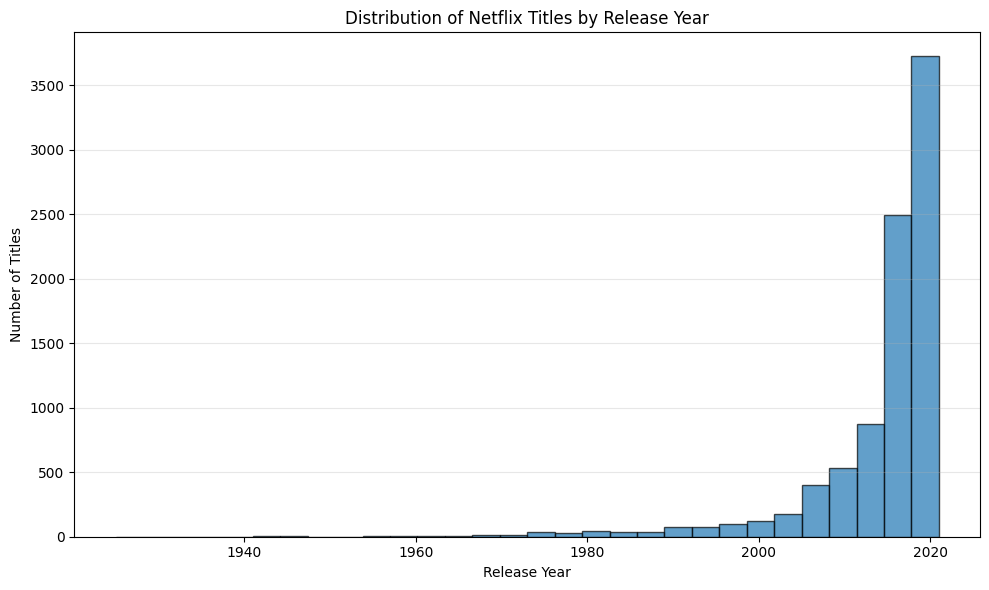

In [10]:
#Distribution of Release Years

plt.figure(figsize=(10, 6))
plt.hist(df['release_year'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.title('Distribution of Netflix Titles by Release Year')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

**Interpretation:** This histogram shows the distribution of Netflix titles by their original release year. 
The distribution appears to be right-skewed, meaning most titles are released in recent decades (2000s-2020s). 
Around 2015-2020, there is a high raise in numbers of titles, suggesting Netflix has acquired many recent titles. 
A few titles can be seen back to the 1940s-1950s, could be for old classical films. 

#### Line graph

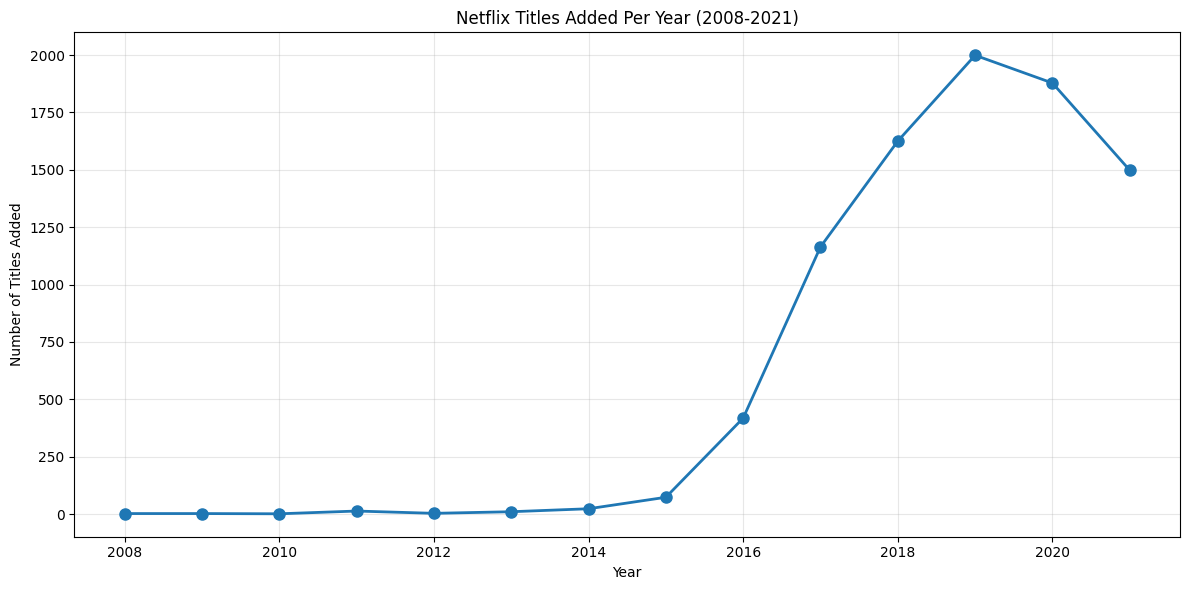

In [11]:
## Visualization: Titles Added Per Year Over Time

titles_per_year = df.groupby('year_added').size()
plt.figure(figsize=(12, 6))
plt.plot(titles_per_year.index, titles_per_year.values, marker='o', linewidth=2, markersize=8)
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.title('Netflix Titles Added Per Year (2008-2021)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

**Interpretation:** This line graph shows an increase in titles added to Netflix over time, with a slight decrease after 2019.
The number of titles added per year grew from 2008 to around 2016, then the numbers raised significantly 
from 2016 to 2019, reaching a peak around 2019-2020. The slight decline from 2019 may indicate the effect of COVID-19 and slow down of acquiring and business. 

#### Grouped Bar Chart (Comparison)

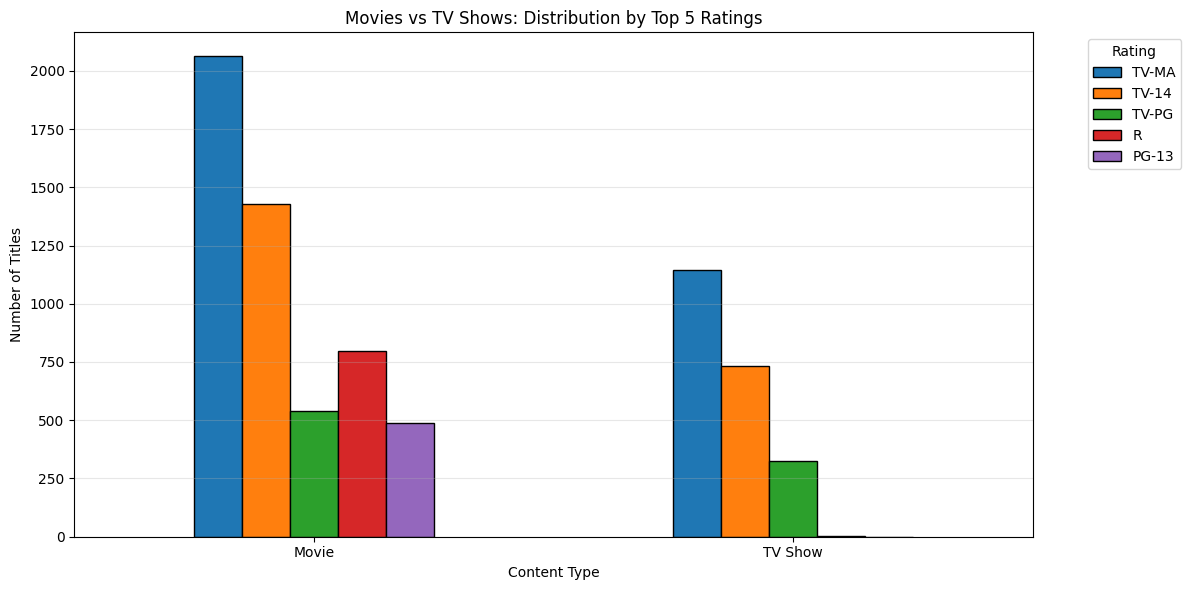

In [13]:
## Visualization: Movies vs TV Shows by Rating

type_rating = pd.crosstab(df['type'], df['rating'])
top_ratings = type_rating.sum().nlargest(5).index
type_rating_top = type_rating[top_ratings]

type_rating_top.plot(kind='bar', figsize=(12, 6), edgecolor='black')
plt.xlabel('Content Type')
plt.ylabel('Number of Titles')
plt.title('Movies vs TV Shows: Distribution by Top 5 Ratings')
plt.xticks(rotation=0)
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

**Interpretation:** The chart shows that TV-MA is the most common rating for both movies and TV shows, followed by TV-14. Movies have a wider mix of ratings like R, PG-13, and TV-PG, but TV shows are mostly TV-MA and TV-14. Overall, this means the platform focuses more on mature and teen audiences than on family-friendly content. 